<a href="https://colab.research.google.com/github/mickeykubo/bi-matrix/blob/master/sentdex_pandas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphing/visualization - Data Analysis with Python 3 and Pandas

https://pythonprogramming.net/graph-visualization-python3-pandas-data-analysis/

sentdexのpandasチュートリアルは分かりやすいと定評があったのだが、余り綺麗なコードではない。

以下ではpandasらしく高速に時系列データを可視化する方法を紹介する。


In [1]:
!pip install pandas-profiling

In [0]:
import pandas as pd
import pandas_profiling as pp

In [0]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
profile = pp.ProfileReport(df)

In [0]:
profile.to_file(outputfile="output.html")

In [0]:
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
df.set_index("Date", inplace=True)

In [0]:
pt = pd.pivot_table(df, index="Date", columns=["region"], values ="AveragePrice")
pt.head()

region,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,1.505,1.380,1.185,1.325,1.425,1.565,1.085,1.660,1.300,1.110,...,1.435,1.060,1.365,1.150,1.475,1.525,1.335,1.205,1.145,1.195
2015-01-11,1.505,1.475,1.195,1.310,1.520,1.565,1.010,1.775,1.470,1.120,...,1.580,1.095,1.505,1.225,1.565,1.555,1.540,1.215,1.170,1.305
2015-01-18,1.550,1.485,1.320,1.260,1.615,1.580,1.130,1.700,1.475,1.150,...,1.540,1.030,1.490,1.310,1.600,1.620,1.500,1.225,1.145,1.255
2015-01-25,1.475,1.485,1.305,1.425,1.590,1.550,1.180,1.735,1.525,1.095,...,1.535,1.090,1.480,1.435,1.550,1.570,1.480,1.285,1.230,1.215
2015-02-01,1.410,1.200,1.105,1.170,1.500,1.440,0.980,1.455,1.215,1.025,...,1.285,0.995,1.265,1.175,1.515,1.455,1.300,1.125,1.090,1.240


In [0]:
resamp = pt.resample("1d").sum().fillna(0)
resamp.head()

region,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,1.505,1.38,1.185,1.325,1.425,1.565,1.085,1.66,1.3,1.11,...,1.435,1.06,1.365,1.15,1.475,1.525,1.335,1.205,1.145,1.195
2015-01-05,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.00,...,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
2015-01-06,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.00,...,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
2015-01-07,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.00,...,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000
2015-01-08,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.00,...,0.000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000


In [0]:
rolling = resamp.rolling(12).mean().dropna()

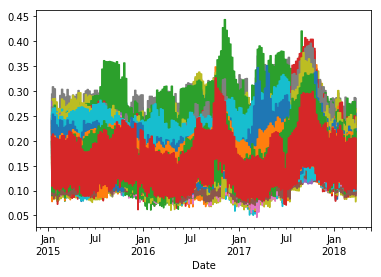

In [0]:
%matplotlib inline
rolling.plot.line(legend=False)

In [0]:
pt = pd.pivot_table(df, index="Date", columns=["region","type"], values ="AveragePrice")
pt.head()

region           Albany              Atlanta         BaltimoreWashington  \
type       conventional organic conventional organic        conventional   
Date                                                                       
2015-01-04         1.22    1.79         1.00    1.76                1.08   
2015-01-11         1.24    1.77         1.11    1.84                1.17   
2015-01-18         1.17    1.93         1.11    1.86                1.23   
2015-01-25         1.06    1.89         1.10    1.87                1.20   
2015-02-01         0.99    1.83         0.96    1.44                1.06   

region                    Boise               Boston           ...    \
type       organic conventional organic conventional organic   ...     
Date                                                           ...     
2015-01-04    1.29         1.01    1.64         1.02    1.83   ...     
2015-01-11    1.22         1.18    1.44         1.10    1.94   ...     
2015-01-18    1.41         1.08    1.44         1.23    2.00   ...     
2015-01-25    1.41         1.03    1.82         1.17    2.01   ...     
2015-02-01    1.15         0.91    1.43         1.22    1.78   ...     

region         Syracuse                Tampa              TotalUS          \
type       conventional organic conventional organic conventional organic   
Date                                                                        
2015-01-04         1.33    1.72         0.97    1.70         0.95    1.46   
2015-01-11         1.45    1.66         1.24    1.84         1.01    1.42   
2015-01-18         1.40    1.84         1.27    1.73         1.03    1.42   
2015-01-25         1.37    1.77         1.21    1.75         1.04    1.53   
2015-02-01         1.26    1.65         0.92    1.68         0.89    1.36   

region             West         WestTexNewMexico          
type       conventional organic     conventional organic  
Date                                                      
2015-01-04         0.89    1.40             0.75    1.64  
2015-01-11         0.95    1.39             0.92    1.69  
2015-01-18         0.96    1.33             0.80    1.71  
2015-01-25         0.94    1.52             0.80    1.63  
2015-02-01         0.84    1.34             0.71    1.77  

[5 rows x 108 columns]

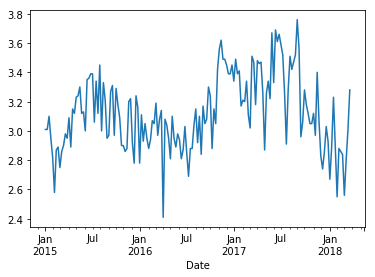

In [0]:
pt.xs("Albany", level="region", axis=1).sum(axis=1).resample("1w").mean().plot()